#  K-means 算法实例

## Load the data

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

In [24]:
# define x,y
x = data.drop(['labels'], axis= 1)
y = data.loc[:,'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [25]:
pd.value_counts(y)

C:\Users\00036777\AppData\Local\Temp\ipykernel_23504\3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


labels
2    1156
1     954
0     890
Name: count, dtype: int64

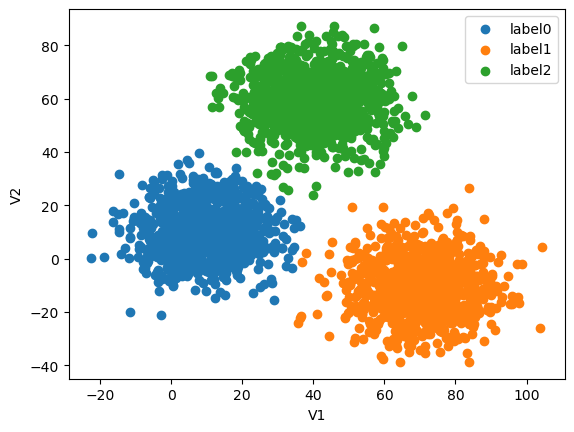

In [26]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
x1 = x.loc[:,'V1']
x2 = x.loc[:,'V2']
fig1 = plt.figure()
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [27]:
# set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(x)

C:\Users\00036777\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [28]:
centers = KM.cluster_centers_

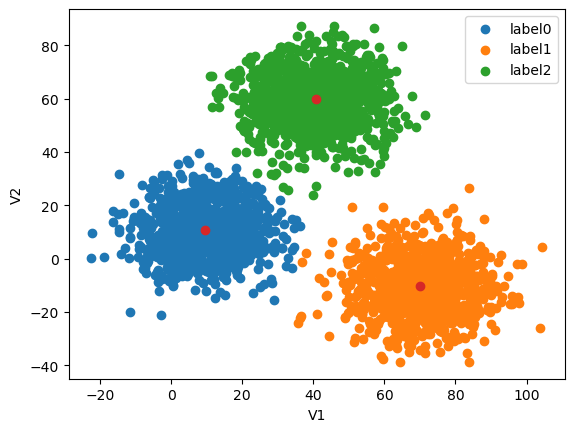

In [29]:
# draw the cluster centers
fig2 = plt.figure()

label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [30]:
# predict V1=80,V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[0]


C:\Users\00036777\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [31]:
# predict based on the trainning data
y_predict = KM.predict(x)
print(pd.value_counts(y_predict), pd.value_counts(y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\00036777\AppData\Local\Temp\ipykernel_23504\4055399087.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict), pd.value_counts(y))


In [32]:
# count the accuray
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.31966666666666665


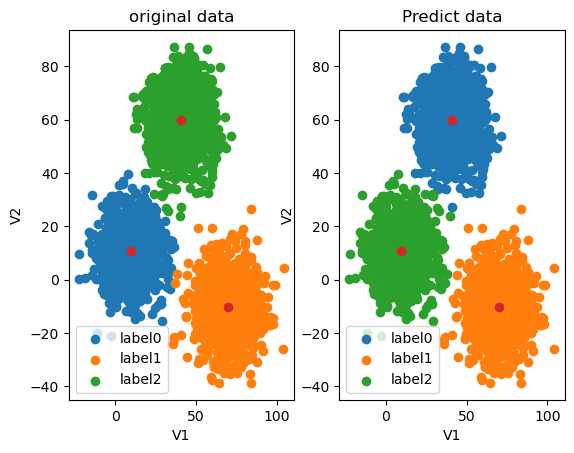

In [33]:
# visualize the data
fig3 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig4 = plt.subplot(122)
label0 = plt.scatter(x1[y_predict==0],x2[y_predict==0])
label1 = plt.scatter(x1[y_predict==1],x2[y_predict==1])
label2 = plt.scatter(x1[y_predict==2],x2[y_predict==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [34]:
# change y_predict's number
y_revised = []
for i in y_predict:
    if i==0:
        y_revised.append(2)
    elif i==1:
        y_revised.append(1)
    else:
        y_revised.append(0)
#print(y_revised)
y_revised = np.array(y_revised)  

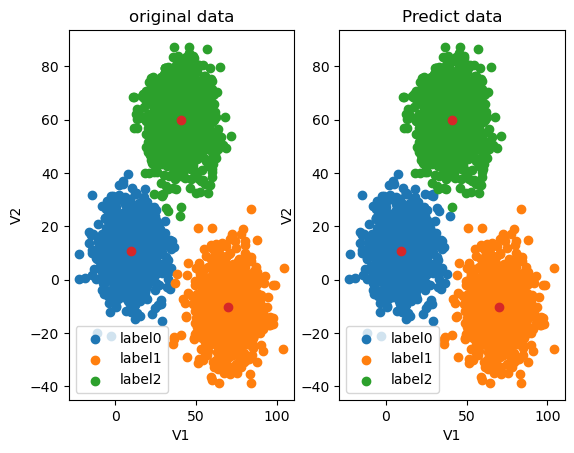

In [35]:
#redraw the y
fig5 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig6 = plt.subplot(122)
label0 = plt.scatter(x1[y_revised==0],x2[y_revised==0])
label1 = plt.scatter(x1[y_revised==1],x2[y_revised==1])
label2 = plt.scatter(x1[y_revised==2],x2[y_revised==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [36]:
# test the accurancy
accurancy = accuracy_score(y,y_revised)
print(accurancy)

0.997


# KNN 算法实例

In [37]:
# establish the KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [38]:
# predict based on the test data (80,60)
y_predict_knn_test = KNN.predict([[80,60]])
y_predict_cnn = KNN.predict(x)
knn_accurancy = accuracy_score(y,y_predict_cnn)
print(knn_accurancy)

1.0


C:\Users\00036777\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


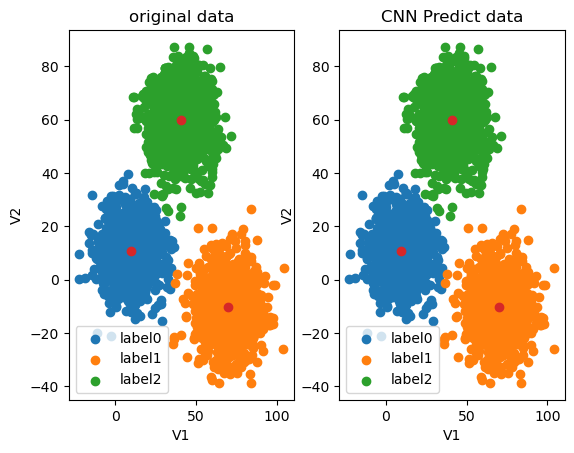

In [39]:
fig7 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig8 = plt.subplot(122)
label0 = plt.scatter(x1[y_predict_cnn==0],x2[y_predict_cnn==0])
label1 = plt.scatter(x1[y_predict_cnn==1],x2[y_predict_cnn==1])
label2 = plt.scatter(x1[y_predict_cnn==2],x2[y_predict_cnn==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('CNN Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

# Meanshift 算法实例

In [40]:
# establis the meanshift model
from sklearn.cluster import MeanShift, estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(x,n_samples=500)
#establish the model
MS = MeanShift(bandwidth=bw)
MS.fit(x)


MeanShift(bandwidth=30.84663454820215)

In [41]:
y_predict_ms = MS.predict(x)
print(pd.value_counts(y_predict_ms), pd.value_counts(y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\00036777\AppData\Local\Temp\ipykernel_23504\988692524.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_ms), pd.value_counts(y))


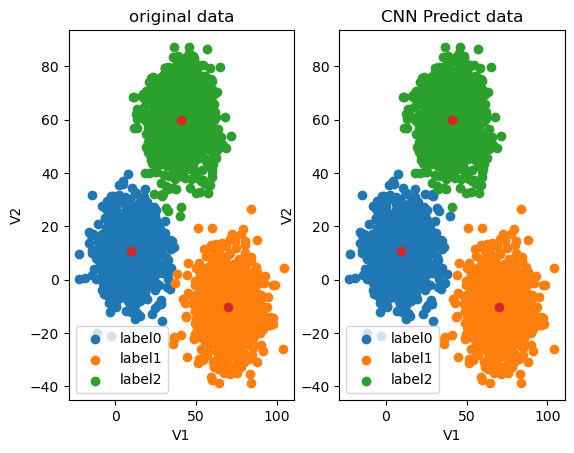

In [42]:
# visulize the result
y_revised_ms = []
for i in y_predict_ms:
    if i==0:
        y_revised_ms.append(2)
    elif i==1:
        y_revised_ms.append(1)
    else:
        y_revised_ms.append(0)
#print(y_revised)
y_revised_ms = np.array(y_revised_ms) 
fig9 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig10 = plt.subplot(122)
label0 = plt.scatter(x1[y_revised_ms==0],x2[y_revised_ms==0])
label1 = plt.scatter(x1[y_revised_ms==1],x2[y_revised_ms==1])
label2 = plt.scatter(x1[y_revised_ms==2],x2[y_revised_ms==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('CNN Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [43]:
accuracy_ms = accuracy_score(y,y_revised_ms)
print(accuracy_ms)

0.997
